In [79]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#used to plot circle or square makrs on the plots
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import GroupShuffleSplit


In [64]:
dataset=pd.read_csv(r"C:\Users\DELL\Downloads\archive(4)\full_df.csv")
dataset.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [65]:
print(dataset.columns)

dataset.drop(columns=["filepath"])


Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [66]:
dataset["label_name"]=dataset["labels"].map({"['N']" : 'Normal', 
               "['D']" : 'Diabetes',
               "['G']" : 'Glaucoma',
               "['C']" : 'Cataract',
               "['A']" : 'Age related Macular Degeneration',
               "['H']" : 'Hypertension',
               "['M']" : 'Pathological Myopia',
               "['O']" : 'Other diseases/abnormalities'})

In [67]:
print(dataset.columns)

dataset.head()

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename',
       'label_name'],
      dtype='object')


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,label_name
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,Normal
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,Normal
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,Diabetes
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,Diabetes
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,Diabetes


In [68]:
dataset["label_name"].value_counts()


Normal                              2873
Diabetes                            1608
Other diseases/abnormalities         708
Cataract                             293
Glaucoma                             284
Age related Macular Degeneration     266
Pathological Myopia                  232
Hypertension                         128
Name: label_name, dtype: int64

In [69]:
dataset["Left-Fundus"].value_counts()


0_left.jpg       2
2985_left.jpg    2
2987_left.jpg    2
2988_left.jpg    2
2989_left.jpg    2
                ..
516_left.jpg     1
518_left.jpg     1
528_left.jpg     1
548_left.jpg     1
4659_left.jpg    1
Name: Left-Fundus, Length: 3358, dtype: int64

In [70]:
dataset["Right-Fundus"].value_counts()

0_right.jpg       2
2985_right.jpg    2
2987_right.jpg    2
2988_right.jpg    2
2989_right.jpg    2
                 ..
516_right.jpg     1
518_right.jpg     1
528_right.jpg     1
548_right.jpg     1
4659_right.jpg    1
Name: Right-Fundus, Length: 3358, dtype: int64

In [46]:
3358+3358

6716

In [47]:
#6716 photographs

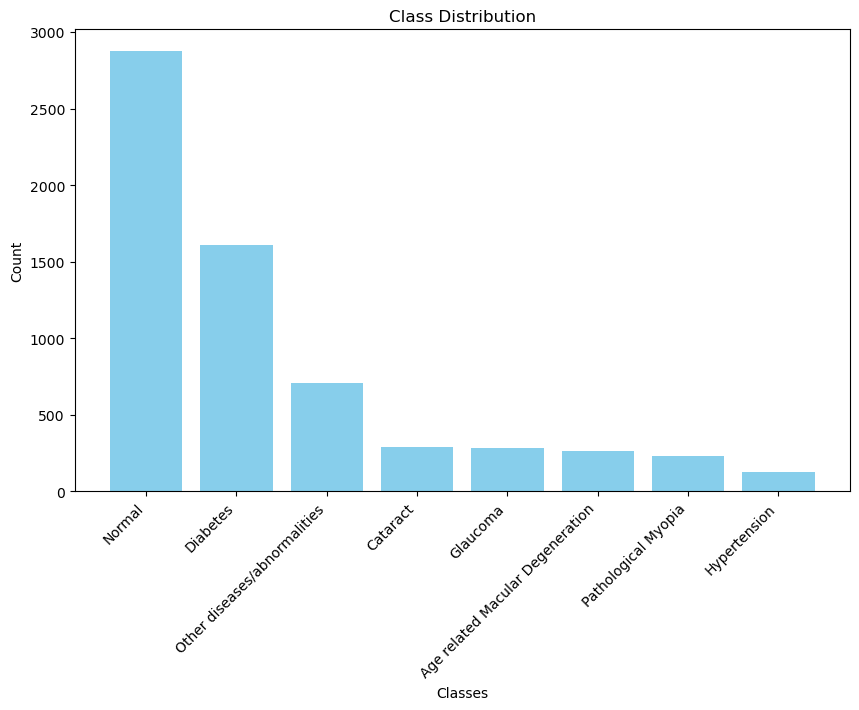

In [59]:

dataset = {'Class': ['Normal', 'Diabetes', 'Other diseases/abnormalities', 'Cataract', 'Glaucoma', 'Age related Macular Degeneration', 'Pathological Myopia', 'Hypertension'],
        'Count': [2873, 1608, 708, 293, 284, 266, 232, 128]}

dataset = pd.DataFrame(dataset)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(dataset['Class'], dataset['Count'], color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right') 
plt.show()


In [71]:
print(dataset.columns)


Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename',
       'label_name'],
      dtype='object')


In [72]:
from IPython.display import display, Image
import matplotlib.pyplot as plt
import os
import random
random_state=200
def explore_each_class(df, class_column, images_folder_path, sample_size=6):
    categories = sorted(df[class_column].unique())

    for i, category in enumerate(categories):
        sub_df = df[df[class_column] == category]
        sample_df = sub_df.sample(sample_size, random_state=random_state)
        filenames = sample_df['filename'].tolist()

        fig, axs = plt.subplots(1, sample_size, figsize=(25, 5))
        fig.suptitle(category, fontsize=20, y = 0.9, x = 0.50)
        
        for j, image in enumerate(filenames):
            image_path = os.path.join(images_folder_path, image)
            image_array = plt.imread(image_path)
            axs[j].imshow(image_array)
            axs[j].axis('on')
            axs[j].set_title(image, fontsize=12)
        plt.show()
     


explore_each_class(dataset, class_column, images_path, 6)


NameError: name 'class_column' is not defined

In [73]:
print(dataset.columns)


Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename',
       'label_name'],
      dtype='object')


In [80]:
valid_size=0.20
test_size=0.20
random_state=200
#60% used for training , 20% for testing and 20% for validation
#groupsarray-like of shape (n_samples,)

    #Group labels for the samples used while splitting the dataset into train/test set.

def split_dataset_PATIENT(dataset_df, patient_column, slice_id_column, valid_size=0.20, test_size=0.20, random_state=16, verbose=True):
    
    """
    Function splitting the dataset into train and test or into train, valid and test splits with patient strafification.
    
    Returns:
        inds [list of numpy arrays]: numpy array with indices for each split
    """
    
    # split the dataset into two parts
    train_valid_inds, test_inds = next(GroupShuffleSplit(test_size=test_size, n_splits=1, random_state=random_state).split(dataset_df, groups=dataset_df[patient_column]))

    # if there is no valid_size, return the indices
    if valid_size == 0:
        inds = [train_valid_inds, test_inds]
        
        if verbose:
            # Confirming that there is no Slice_idx overlap between the datasets
            print(f'Slice ID overlap between train and test datasets: {np.intersect1d(np.unique(train_valid_inds), np.unique(test_inds))}')
    
            # Confirming that there is no Patient_ID overlap between the datasets
            train_valid_patient_IDs = dataset_df.loc[train_valid_inds, patient_column].to_numpy()
            test_patient_IDs = dataset_df.loc[test_inds, patient_column].to_numpy()
            print(f'Patient ID overlap between train and test datasets: {np.intersect1d(np.unique(train_valid_patient_IDs), np.unique(test_patient_IDs))}\n') 
            

    # if there is valid_size prepare the data for further splitting    
    else:       
        # reset indices for further spitting
        train_valid_df = dataset_df.loc[train_valid_inds]
        test_df = dataset_df.loc[test_inds]

        train_valid_df.reset_index(inplace=True, drop=True)
        test_df.reset_index(inplace=True, drop=True)

        # calculate valid_size with respect to train_valid_df
        valid_size_recalculated = valid_size * len(dataset_df) / len(train_valid_df)

        # split the train_valid datatset into train and valid, reset index
        train_inds, valid_inds = next(GroupShuffleSplit(test_size=valid_size_recalculated, n_splits=1, random_state=random_state).split(train_valid_df, groups=train_valid_df[patient_column]))

        train_df = train_valid_df.loc[train_inds]
        valid_df = train_valid_df.loc[valid_inds]

        train_df.reset_index(inplace=True, drop=True)
        valid_df.reset_index(inplace=True, drop=True)

        # retriving original indices
        train_slice_inds = train_df[slice_id_column].to_numpy()
        valid_slice_inds = valid_df[slice_id_column].to_numpy()
        test_slice_inds = test_df[slice_id_column].to_numpy()

        # retriving info about PatientID for rechecking
        train_patient_inds = train_df[patient_column].to_numpy()
        valid_patient_inds = valid_df[patient_column].to_numpy()
        test_patient_inds = test_df[patient_column].to_numpy()

        if verbose:
            # Confirming that there is no Slice_idx overlap between the datasets
            print(f'Slice ID overlap between train and valid datasets: {np.intersect1d(np.unique(train_slice_inds), np.unique(valid_slice_inds))}') 
            print(f'Slice ID overlap between train and test datasets: {np.intersect1d(np.unique(train_slice_inds), np.unique(test_slice_inds))}')
            print(f'Slice ID overlap between valid and test datasets: {np.intersect1d(np.unique(valid_slice_inds), np.unique(test_slice_inds))}\n')

            # Confirming that there is no Patient_ID overlap between the datasets
            print(f'Patient ID overlap between train and valid datasets: {np.intersect1d(np.unique(train_patient_inds), np.unique(valid_patient_inds))}') 
            print(f'Patient ID overlap between train and test datasets: {np.intersect1d(np.unique(train_patient_inds), np.unique(test_patient_inds))}')
            print(f'Patient ID overlap between valid and test datasets: {np.intersect1d(np.unique(valid_patient_inds), np.unique(test_patient_inds))}\n')
            
        inds = [train_slice_inds, valid_slice_inds, test_slice_inds]

    return inds


def split_dataset_PATIENT_classes_amount(dataset_df, patient_column, slice_id_column, class_column, valid_size=0, test_size=0.20, random_state=16, treshold=None, verbose=True):
    """
    Function splitting the dataset into train and test or into train, valid and test splits with patient strafification.
   
    Returns:
        inds [list of numpy arrays]: numpy array with indices for each split
    
    """

    # Extract classes from the dataset and their amount
    number_classes_dataset = dataset_df[class_column].nunique()
    
    # If treshold not given, calculate it is as half of ratio, in case of equal classes
    if treshold:
        treshold = treshold
    else:
        treshold = 0.5 / number_classes_dataset 
    
    if verbose:
            print(f'Random state {random_state}')
            print(f'Treshold for each class representation in each split {treshold}\n')


    # Split for train, validation, test with patient stratification
    inds = split_dataset_PATIENT(dataset_df, patient_column, slice_id_column, valid_size=valid_size, test_size=test_size, random_state=random_state, verbose=verbose)
    
    dataframes = []
    number_classes = []
    value_counts_min_splits = []
    
    for i, split_inds in enumerate(inds):
        # Make a dataframe for each split
        df = dataset_df.loc[split_inds]
        dataframes.append(df)
             
        # Count the number of slices of each class in each split and save the minimum number from each split
        value_counts = df[class_column].value_counts().sort_index()
        value_counts_ratio = value_counts / len(df)
        value_counts_min = value_counts_ratio.min()
        value_counts_min_splits.append(value_counts_min)
        
        # Count the number of classes in each split
        number_classes_split = len(value_counts)
        number_classes.append(number_classes_split)
        
        if verbose:
            print(value_counts_ratio)
    
    if verbose:  
        print(f'Minimum ratio for a class in all splits: {min(value_counts_min_splits)}')
        print(f'Number of classes in each split {set(number_classes)}\n')
    
    # In case not all classes are contained in each split or the amount of slices in smaller than treshold, 
    ## increment random state and make the splits until all classes are represented with the wished amount
    while (len(set(number_classes)) > 1) or (min(value_counts_min_splits) < treshold):
        random_state += 1
        if verbose: 
            print(f'Not all classes are contained in each split or class(es) are underrepresented - incrementing random state to {random_state}\n')
            
        inds = split_dataset_PATIENT(dataset_df, patient_column, slice_id_column, valid_size=valid_size, test_size=test_size, random_state=random_state, verbose=verbose)
            
        dataframes = []
        number_classes = []
        value_counts_min_splits = []

        for i, split_inds in enumerate(inds):

            # Make a dataframe for each split
            df = dataset_df.loc[split_inds]
            dataframes.append(df)

            # Count the number of slices of each class in each split and save the minimum number from each split
            value_counts = df[class_column].value_counts().sort_index()
            value_counts_ratio = value_counts / len(df)
            value_counts_min = value_counts_ratio.min()
            value_counts_min_splits.append(value_counts_min)

            # Count the number of classes in each split
            number_classes_split = len(value_counts)
            number_classes.append(number_classes_split)
            
            if verbose:
                print(value_counts_ratio)

        if verbose:  
            print(f'Minimum ratio for a class in all splits: {min(value_counts_min_splits)}')
            print(f'Number of classes in each split {set(number_classes)}')
        
    if verbose:
        print(f'All classes are contained and the number of slices is higher than treshold, which amounts to {treshold} of all the slices contained in a given split')
            
    return inds


def plot_classes_distribution(dataframes, class_column, colors, figure_title=None,  plot_titles=None, figsize=(15, 6), equal_y_scale=False, fig_output_path=None):
    """
    Function plotting classes distribution in dataframe(s).
  
    """

    subplots_number = len(dataframes)
    dataframes_value_counts = []
    plt.rcParams.update({'font.size': 16})
    fig, axs = plt.subplots(1,subplots_number, figsize=figsize)
    
    if figure_title:
        fig.suptitle(figure_title, fontsize=22, y = 1, x = 0.52)
        
    for i, df in enumerate(dataframes):
        df_value_counts = df[class_column].value_counts().sort_index()
        
        if len(dataframes) == 1:
            axs.bar(df_value_counts.index, df_value_counts, color=colors[0], alpha=0.7)
            axs.tick_params(axis='x', rotation=90)  
            
            if plot_titles:
                axs.set_title(plot_titles)
                
        else:
            axs[i].bar(df_value_counts.index, df_value_counts, color=colors[i], alpha=0.7)
            axs[i].tick_params(axis='x', rotation=90)
                       
            if plot_titles:
                axs[i].set_title(plot_titles[i])
        
        dataframes_value_counts.append(df_value_counts)
    
    fig.tight_layout(pad=2.0)
    
    if equal_y_scale:
        y_min_plots = []
        y_max_plots = []
    
        for i, ax in enumerate(axs):
            y_min, y_max = axs[i].get_ylim()
            y_min_plots.append(y_min)
            y_max_plots.append(y_max)
            
        for i, ax in enumerate(axs):
            axs[i].set_ylim(min(y_min_plots), max(y_max_plots))
    
    if fig_output_path:
        plt.savefig(fig_output_path, dpi=100, pad_inches=1, facecolor="white")
        
    plt.show()
    
    return dataframes_value_counts


In [81]:
dataset.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,label_name
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,Normal
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,Normal
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,Diabetes
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,Diabetes
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,Diabetes


# Train-Test-Split


In [82]:
classification=["Pathological Myopia","Normal"]

myopia_df = dataset[dataset['label_name'].isin(classification)]
myopia_df = myopia_df.reset_index(drop=True)
myopia_df['Slice_idx'] = myopia_df.index

# Class labels chosen to be compatible with ImageGenerator, which assignes the classes aplhabetically
myopia_df['label_num'] = myopia_df['label_name'].replace({'Pathological Myopia' : 1, 'Normal' : 0})
myopia_df = myopia_df.drop(columns=['Left-Fundus', 'Right-Fundus','Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'labels', 'N', 'D', 'G', 'C', 'A', 'H', 'M', 'O','target'])

print(f'The healthy and myopia_dataset contains {myopia_df.shape} slices.')
myopia_df.head()

The healthy and myopia_dataset contains (3105, 8) slices.


,ID,Patient Age,Patient Sex,filepath,filename,label_name,Slice_idx,label_num
0,0,69,Female,../input/ocular-disease-recognition-odir5k/ODI...,0_right.jpg,Normal,0,0
1,1,57,Male,../input/ocular-disease-recognition-odir5k/ODI...,1_right.jpg,Normal,1,0
2,8,59,Male,../input/ocular-disease-recognition-odir5k/ODI...,8_right.jpg,Normal,2,0
3,10,70,Male,../input/ocular-disease-recognition-odir5k/ODI...,10_right.jpg,Normal,3,0
4,13,60,Female,../input/ocular-disease-recognition-odir5k/ODI...,13_right.jpg,Pathological Myopia,4,1


In [83]:


indices = split_dataset_PATIENT_classes_amount(myopia_df, patient_column='ID', slice_id_column='Slice_idx', 
                                            class_column='label_num', valid_size=0.20, test_size=0.20, random_state=random_state, treshold=0.07, verbose=False)

print(f'There are {len(indices[0])} slices in the training set')
print(f'There are {len(indices[1])} slices in the validation set')
print(f'There are {len(indices[2])} slices in the test set\n')
     


There are 1860 slices in the training set
There are 617 slices in the validation set
There are 628 slices in the test set



In [84]:
train = indices[0]
valid = indices[1]
test = indices[2]

train_df = myopia_df.loc[train]
valid_df = myopia_df.loc[valid]
test_df = myopia_df.loc[test]

train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

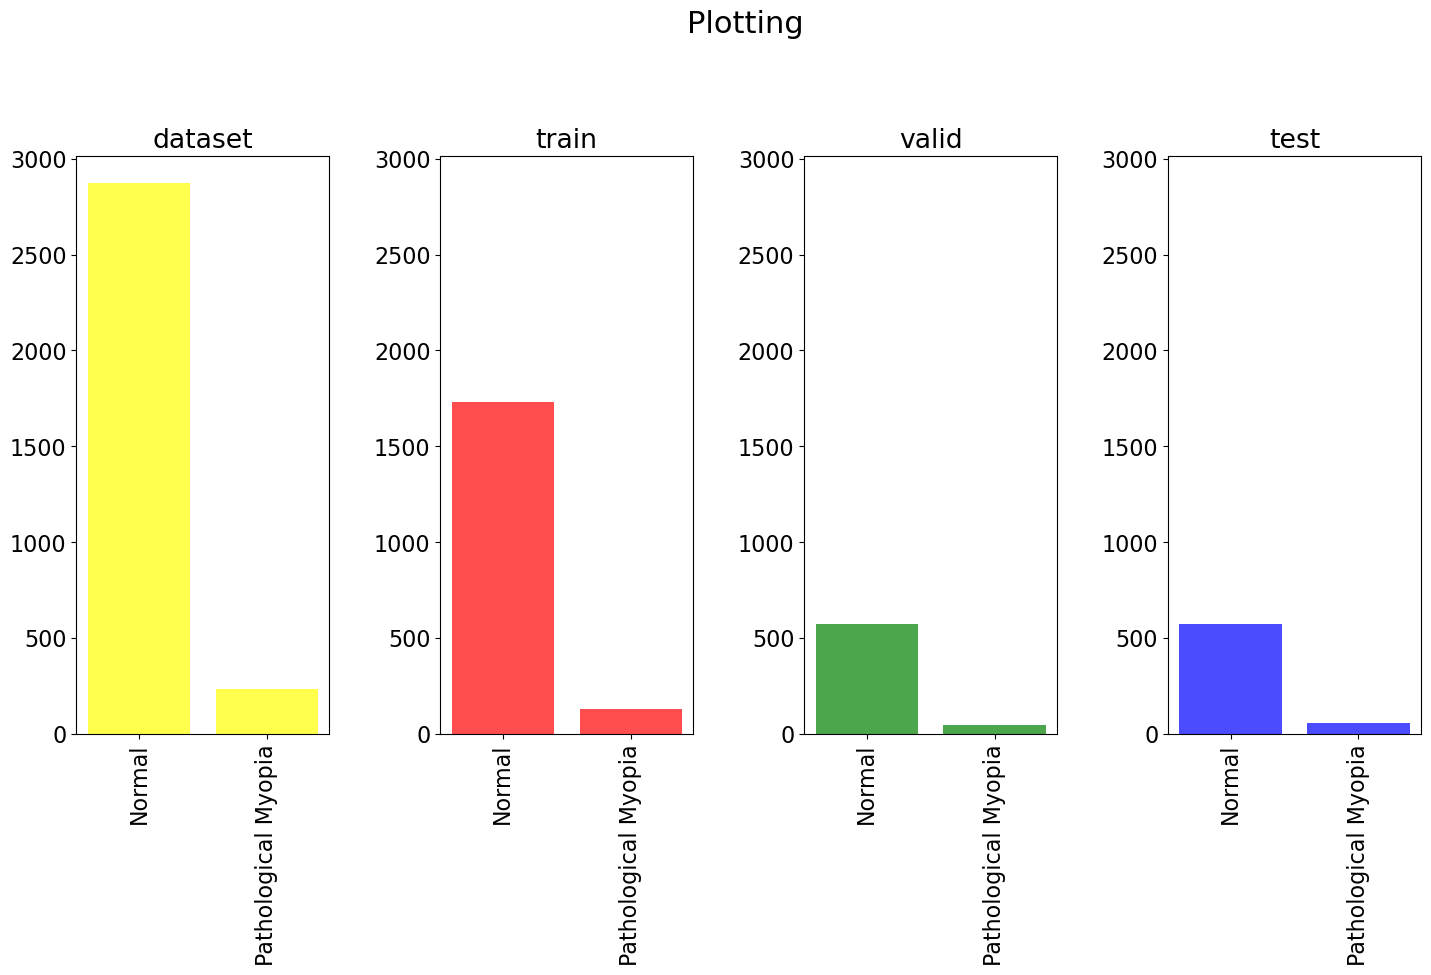

In [85]:
value_counts_plot = plot_classes_distribution([myopia_df, train_df, valid_df, test_df], class_column='label_name', 
                          colors=['yellow', 'red', 'green', 'blue'], figure_title="Plotting",  
                          plot_titles=['dataset', 'train', 'valid', 'test'], figsize=(15, 10), equal_y_scale=True)
     
    

In [92]:
path=r"C:\Users\DELL\Downloads\archive(4)"

In [118]:
path=r"C:\Users\DELL\Downloads\archive(4)"
train_df.to_csv(os.path.join(path, 'myopia_train_df.csv'))
valid_df.to_csv(os.path.join(path, 'myopia_valid_df.csv'))
test_df.to_csv(os.path.join(path, 'myopia_test_df.csv'))
     

In [86]:
import json
import seaborn as sns
import math
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [88]:
images_path=r"C:\Users\DELL\Downloads\archive(4)\preprocessed_images"

In [129]:
#img_size=(512,512)
from PIL import Image
import os
output_path=r"C:\Users\DELL\Downloads\archive(4)\preprocessed1_images"

def resize_images(images_path, output_path, target_size=(224, 224)):
    # Ensure the output folder exists
    os.makedirs(output_path, exist_ok=True)

    # List all files in the input folder
    image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg') or f.endswith('.png')]

    for image_file in image_files:
        # Construct the full path for input and output images
        input_path = os.path.join(images_path, image_file)
        output_path = os.path.join(output_path, image_file)

        # Open the image
        img = Image.open(images_path)

        # Resize the image
        img_resized = img.resize(target_size, Image.ANTIALIAS)

        # Save the resized image
        img_resized.save(output_path)

# Example usage

resize_images(images_path, output_path, target_size=(224, 224))


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\DELL\\Downloads\\archive(4)\\preprocessed_images'

In [89]:
img_size=(512,512)

In [90]:
freeze_layer=420
neurons_set = [512, 256, 128, 64, 32]
dropout = 0.2

In [93]:
random_state=200
class_weights = True
EPOCHS = 100
learning_rate = 0.0001
BATCH_SIZE = 32

train_df = pd.read_csv(os.path.join(path, 'myopia_train_df.csv'), index_col=0,dtype="str")
valid_df = pd.read_csv(os.path.join(path, 'myopia_valid_df.csv'), index_col=0,dtype="str")
test_df = pd.read_csv(os.path.join(path, 'myopia_test_df.csv'), index_col=0,dtype="str")
train_df.head()
     

,ID,Patient Age,Patient Sex,filepath,filename,label_name,Slice_idx,label_num
0,18,58,Male,../input/ocular-disease-recognition-odir5k/ODI...,18_right.jpg,Pathological Myopia,6,1
1,29,59,Male,../input/ocular-disease-recognition-odir5k/ODI...,29_right.jpg,Normal,7,0
2,31,62,Male,../input/ocular-disease-recognition-odir5k/ODI...,31_right.jpg,Normal,8,0
3,37,41,Male,../input/ocular-disease-recognition-odir5k/ODI...,37_right.jpg,Normal,10,0
4,38,75,Male,../input/ocular-disease-recognition-odir5k/ODI...,38_right.jpg,Normal,11,0


In [94]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator():
    train_image_gen = ImageDataGenerator(rescale=1./255.)
    
    valid_image_gen = ImageDataGenerator(rescale=1./255.)
    
    test_image_gen = ImageDataGenerator(rescale=1./255.)
    
    return train_image_gen, valid_image_gen, test_image_gen



In [95]:
def generator_function(train_image_gen, valid_image_gen, test_image_gen, 
                   train_df, valid_df, test_df, 
                   directory,class_mode
                   ):
    #x column is filename and y column is label_num
    #classes not mentioned so it refers to y_col
    #y_col is label_num which is in binary so class mode is binary
    train_generator=train_image_gen.flow_from_dataframe(
    train_df,
    directory=directory,
    x_col='filename',
    y_col='label_num',
    weight_col=None,
    target_size=(512,512),
    color_mode='rgb',
  
    class_mode=class_mode,
    batch_size=32,
    shuffle=True,
    seed=42,)
    
    test_generator=test_image_gen.flow_from_dataframe(
        
         test_df,
        directory=directory,
        x_col='filename',
        y_col='label_num',
        target_size=(512,512),
        color_mode='rgb',
        class_mode=class_mode,
        batch_size=32,
        shuffle=False,
        seed=42,
    )
    valid_generator = valid_image_gen.flow_from_dataframe(
        valid_df,
        directory=directory,
        x_col='filename',
        y_col='label_num',
        target_size=(512,512),
        color_mode='rgb',
        class_mode=class_mode,
        batch_size=32,
        shuffle=False,
        seed=42)
    return train_generator,test_generator,valid_generator
    
    
# Converting label_num column to string
myopia_df['label_num']=myopia_df['label_num'].apply(lambda x: str(x))

In [96]:
train_image_gen, valid_image_gen, test_image_gen = image_generator()

In [97]:
train_gen, valid_gen, test_gen  = generator_function(train_image_gen, valid_image_gen, test_image_gen, 
                                                 train_df, valid_df, test_df, 
                                                 directory= images_path,class_mode='binary'
                                                 
                                                
                                                 )

Found 1860 validated image filenames belonging to 2 classes.
Found 628 validated image filenames belonging to 2 classes.
Found 617 validated image filenames belonging to 2 classes.


In [98]:

data_type = myopia_df['label_num'].dtype
print(f'Data type of label_num column: {data_type}')


Data type of label_num column: object


In [99]:

print("Data type of 'label_num' column:", myopia_df['label_num'].dtype)


Data type of 'label_num' column: object


In [100]:
print("Unique values in 'label_num':", myopia_df['label_num'].unique())


Unique values in 'label_num': ['0' '1']


In [101]:
print("Number of null values in 'label_num':", myopia_df['label_num'].isnull().sum())


Number of null values in 'label_num': 0


In [102]:
print("Column names in DataFrame:", myopia_df.columns)



Column names in DataFrame: Index(['ID', 'Patient Age', 'Patient Sex', 'filepath', 'filename',
       'label_name', 'Slice_idx', 'label_num'],
      dtype='object')


In [103]:
myopia_df["label_num"].value_counts()

0    2873
1     232
Name: label_num, dtype: int64

In [104]:
data_type = myopia_df['label_num'].dtype
data_type

dtype('O')

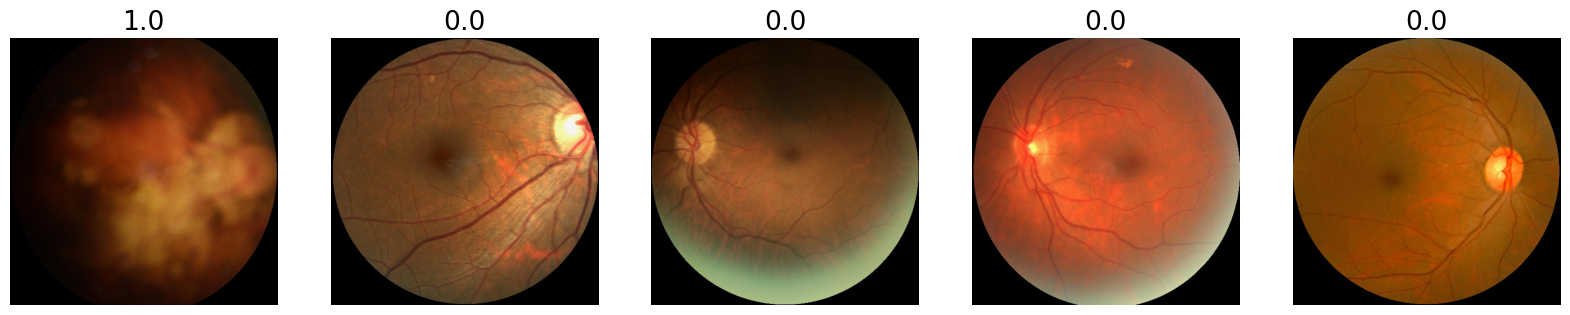

In [105]:
def validate_generator(generator):
    images, labels = generator[0]
    fig, axs = plt.subplots(1, 5, figsize=(20,10))
    for i in range(5):
        axs[i].imshow(images[i])
        axs[i].set_title(labels[i])
        axs[i].axis('off')
    plt.show()
    

validate_generator(train_gen)

In [166]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(train_gen.labels), y=train_gen.labels) 
class_weights = dict(zip(np.unique(train_gen.labels), class_weights))
class_weights
     

{0: 0.5378831694621168, 1: 7.099236641221374}

In [206]:
majority_class = train_df[train_df['label_num'] == '0']
minority_class = train_df[train_df['label_num'] == '1']

# Oversample the minority class
oversampled_minority = minority_class.sample(n=len(majority_class), replace=True, random_state=42)
oversampled_minority

,ID,Patient Age,Patient Sex,filepath,filename,label_name,Slice_idx,label_num
1121,1571,65,Male,../input/ocular-disease-recognition-odir5k/ODI...,1571_left.jpg,Pathological Myopia,1872,1
1110,1553,51,Female,../input/ocular-disease-recognition-odir5k/ODI...,1553_left.jpg,Pathological Myopia,1856,1
176,1529,57,Male,../input/ocular-disease-recognition-odir5k/ODI...,1529_right.jpg,Pathological Myopia,299,1
1125,1579,57,Female,../input/ocular-disease-recognition-odir5k/ODI...,1579_left.jpg,Pathological Myopia,1876,1
944,174,71,Female,../input/ocular-disease-recognition-odir5k/ODI...,174_left.jpg,Pathological Myopia,1580,1
...,...,...,...,...,...,...,...,...
187,1549,78,Female,../input/ocular-disease-recognition-odir5k/ODI...,1549_right.jpg,Pathological Myopia,317,1
216,1601,73,Female,../input/ocular-disease-recognition-odir5k/ODI...,1601_right.jpg,Pathological Myopia,358,1
195,1561,63,Female,../input/ocular-disease-recognition-odir5k/ODI...,1561_right.jpg,Pathological Myopia,328,1
1112,1557,35,Female,../input/ocular-disease-recognition-odir5k/ODI...,1557_left.jpg,Pathological Myopia,1860,1


,ID,Patient Age,Patient Sex,filepath,filename,label_name,Slice_idx,label_num
0,18,58,Male,../input/ocular-disease-recognition-odir5k/ODI...,18_right.jpg,Pathological Myopia,6,1
1,29,59,Male,../input/ocular-disease-recognition-odir5k/ODI...,29_right.jpg,Normal,7,0
2,31,62,Male,../input/ocular-disease-recognition-odir5k/ODI...,31_right.jpg,Normal,8,0
3,37,41,Male,../input/ocular-disease-recognition-odir5k/ODI...,37_right.jpg,Normal,10,0
4,38,75,Male,../input/ocular-disease-recognition-odir5k/ODI...,38_right.jpg,Normal,11,0


In [107]:
train_df["label_num"].value_counts()

0    1729
1     131
Name: label_num, dtype: int64

In [108]:
#you can use freeze_to(n:int) to specify which layer groups you want to freeze and which you want to train. 
#The first n layer groups will be frozen and the last n layer groups will be unfrozen.

In [109]:
from tensorflow.keras.models import Sequential, Model
def pretrained(pretrained_model, transfer_layer, freeze_layer, weights='imagenet', verbose=True):
    model = pretrained_model(include_top=True, weights=weights)
    transfer_layer = model.get_layer(transfer_layer)
    pretrained_model = Model(inputs=model.input, outputs=model.output)

    # Till the freeze layer, the weights will be unchanged
    for layer in pretrained_model.layers[0:freeze_layer]:
        layer.trainable = False

    if verbose:
        print('Pre-trained model layers and their trainability')
        for layer in model.layers:
            print(layer.name, layer.trainable)

    return pretrained_model



In [160]:
from tensorflow.keras.layers import *

def model_building(pretrained, neurons,  dropout=0.2):
    
  
    model = Sequential()
    model.add(pretrained)

    for n in layer_neurons:
        model.add(Dense(n, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))
    
    model.add(Dense(1, activation='sigmoid'))#binary classification so sigmoid activation is used
        
    return model

In [161]:
def model_final(model, learning_rate, optimizer="Adam", loss="binary_crossentropy"):
    
    if optimizer == "Adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss=loss, metrics=keras.metrics.BinaryAccuracy(name="binary_accuracy")
)
    
    return model


In [196]:
from keras.callbacks import TerminateOnNaN
from sklearn.utils import class_weight


def training(model,model_name,path,train_gen,valid_gen,class_weights=True):
    model_folder=os.path.join(path,model_name)
    #keep a check check of the path if it does not exists then make a directory
    if not os.path.exists(model_folder):
        os.makedirs(model_folder)
            
    checkpoint_path = os.path.join(model_folder, "checkpoint_model.h5")

    checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor = "val_loss", 
                             verbose = 1, 
                             save_best_only = True, 
                             mode = "auto", 
                             save_weights_only = False)
    
    #"monitor: Quantity to be monitored. Defaults to "val_loss".
    #"min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. Defaults to 0."
    #"patience: Number of epochs with no improvement after which training will be stopped. Defaults to 0.
    #"mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity. Defaults to "auto"."
#min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. Defaults to 0.
#patience: Number of epochs with no improvement after which training will be stopped. Defaults to 0."
    early_stopping = EarlyStopping(monitor = "val_loss", 
                      mode = "auto", 
                      patience=10,
                      restore_best_weights=True)  
    # Add TerminateOnNaN callback
    callbacks_list = [checkpoint,early_stopping,
    TerminateOnNaN(),]
    
    
    class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(train_gen.labels), y=train_gen.labels) 
    class_weights = dict(zip(np.unique(train_gen.labels), class_weights))

 
    
    history=model_fitting=model.fit(train_gen,epochs=100,verbose=1,callbacks=callbacks_list,validation_data=valid_gen,class_weight=class_weights)
    history_df.to_csv(os.path.join(model_folder, "history.csv"))
    return history

            

In [197]:
from tensorflow.keras.applications import DenseNet121
pretraining=pretrained(pretrained_model=DenseNet121,transfer_layer="conv5_block16_1_conv",freeze_layer=420,verbose=False)
modelfinal=model_building(pretraining,neurons=neurons_set,dropout=dropout)
modelfinal=model_final(modelfinal,learning_rate=0.0001,loss="binary_crossentropy")


In [198]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

In [1]:
history=training(modelfinal,"pathological myopia", r"C:\Users\DELL\Downloads\archive(4)\output_model", train_gen , valid_gen)

NameError: name 'training' is not defined